In [1]:
import numpy as np                              #Linear algebra #used for working with arrays
import pandas as pd                             #Analyze data.Learning by reading 
import matplotlib.pyplot as plt                 #Data visuallization
import seaborn as sns                           #Data Visuallization library based on matplotlib             
import warnings
warnings.filterwarnings('ignore')               #It ignores the warning
from sklearn.preprocessing import LabelEncoder  # Converting categorical column into numerical column
le=LabelEncoder()                                #creating alias

# Salary Prediction

# problem statement: classification on salary whether less than 50k or greater than 50k

In [2]:
#  Reading csv

In [3]:
data=pd.read_csv("C:/Users/DELL/Downloads/salary.csv")
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data.salary.value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [5]:
data.shape
#data.head()
#data.tail()
#data.describe()

(32561, 15)

In [6]:
data.isnull().sum()#data is clean

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [7]:
data.dtypes # data is not numerical

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [8]:
#rename the colunm
data=data.rename({"marital-status":"marital","native-country":"counrty","education-num":"educationN","capital-gain":"capitalA","capital-loss":"capitalB","hours-per-week":"hours"},axis=1)
data

,age,workclass,fnlwgt,education,educationN,marital,occupation,relationship,race,sex,capitalA,capitalB,hours,counrty,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [10]:
#conversion of categarical into numerical(usingLabelEncoder)
data.workclass=le.fit_transform(data.workclass)
data.education=le.fit_transform(data.education)
data.marital=le.fit_transform(data.marital)
data.occupation=le.fit_transform(data.occupation)
data.relationship=le.fit_transform(data.relationship)
data.race=le.fit_transform(data.race)
data.sex=le.fit_transform(data.sex)
data.counrty=le.fit_transform(data.counrty)
data.salary=le.fit_transform(data.salary)

In [11]:
data.dtypes #data is numerical

age             int64
workclass       int32
fnlwgt          int64
education       int32
educationN      int64
marital         int32
occupation      int32
relationship    int32
race            int32
sex             int32
capitalA        int64
capitalB        int64
hours           int64
counrty         int32
salary          int32
dtype: object

In [12]:
#data.shape

In [13]:
data.salary.value_counts() # data is imbalance

0    24720
1     7841
Name: salary, dtype: int64

In [14]:
data.drop_duplicates(inplace=True)

In [15]:
#data.shape

In [16]:
data_x=data.iloc[:,0:-1]  #independent and dependent features
data_y=data.iloc[:,-1]

In [17]:
data_x.head()
#data_y.head()

,age,workclass,fnlwgt,education,educationN,marital,occupation,relationship,race,sex,capitalA,capitalB,hours,counrty
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5


# Model on Training data To Check Performnace

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.linear_model import LogisticRegression
dt=LogisticRegression()

In [20]:
px_train,px_test,py_train,py_test=train_test_split(data_x,data_y,test_size=0.2,random_state=101)

In [21]:
px_train.shape,px_test.shape,py_train.shape,py_test.shape

((26029, 14), (6508, 14), (26029,), (6508,))

#                 # BASE MODEL

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [23]:
lr.fit(px_train,py_train)

LogisticRegression()

In [24]:
lr_pred=lr.predict(px_test)
lr_pred

array([0, 1, 0, ..., 0, 0, 0])

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
s1=confusion_matrix(py_test,lr_pred)
s1

array([[4671,  289],
       [1096,  452]], dtype=int64)

In [27]:
lr_acc=s1.diagonal().sum()/s1.sum()*100
lr_acc

78.71850030731407

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(lr_pred,py_test))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      5767
           1       0.29      0.61      0.39       741

    accuracy                           0.79      6508
   macro avg       0.62      0.71      0.63      6508
weighted avg       0.87      0.79      0.82      6508



# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [31]:
dt.fit(px_train,py_train)

DecisionTreeClassifier()

In [32]:
dt_pred=dt.predict(px_test)
dt_pred

array([0, 0, 0, ..., 1, 1, 1])

In [33]:
s2=confusion_matrix(py_test,dt_pred)
s2

array([[4313,  647],
       [ 562,  986]], dtype=int64)

In [34]:
dt_acc=s2.diagonal().sum()/s2.sum()*100
dt_acc

81.42286416717886

In [35]:
print(classification_report(dt_pred,py_test))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      4875
           1       0.64      0.60      0.62      1633

    accuracy                           0.81      6508
   macro avg       0.75      0.74      0.75      6508
weighted avg       0.81      0.81      0.81      6508



# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [37]:
rf.fit(px_train,py_train)

RandomForestClassifier()

In [38]:
rf_pred=rf.predict(px_test)
rf_pred

array([0, 1, 0, ..., 0, 1, 0])

In [39]:
s3=confusion_matrix(py_test,rf_pred)
s3

array([[4654,  306],
       [ 572,  976]], dtype=int64)

In [40]:
rf_acc=s3.diagonal().sum()/s3.sum()*100
rf_acc

86.50891210817456

In [41]:
print(classification_report(rf_pred,py_test))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      5226
           1       0.63      0.76      0.69      1282

    accuracy                           0.87      6508
   macro avg       0.78      0.83      0.80      6508
weighted avg       0.88      0.87      0.87      6508



# KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
kn= KNeighborsClassifier(n_neighbors=17)

In [43]:
kn.fit(px_train,py_train)

KNeighborsClassifier(n_neighbors=17)

In [44]:
kn_pred=kn.predict(px_test)
kn_pred

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
s4=confusion_matrix(py_test,kn_pred)
s4

array([[4852,  108],
       [1196,  352]], dtype=int64)

In [46]:
kn_acc=s4.diagonal().sum()/s4.sum()*100
kn_acc

79.96312231100184

In [47]:
print(classification_report(kn_pred,py_test))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      6048
           1       0.23      0.77      0.35       460

    accuracy                           0.80      6508
   macro avg       0.60      0.78      0.62      6508
weighted avg       0.93      0.80      0.84      6508



# Boosting(Adaboost)

In [48]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [49]:
ad=AdaBoostClassifier(RandomForestClassifier(),n_estimators=5)

In [50]:
ad.fit(px_train,py_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=5)

In [51]:
ad_pred=ad.predict(px_test)
ad_pred

array([0, 0, 0, ..., 0, 1, 0])

In [52]:
s5=confusion_matrix(py_test,ad_pred)
s5

array([[4671,  289],
       [ 587,  961]], dtype=int64)

In [53]:
ad_acc=s5.diagonal().sum()/s5.sum()*100
ad_acc

86.53964351567302

In [54]:
print(classification_report(ad_pred,py_test))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      5258
           1       0.62      0.77      0.69      1250

    accuracy                           0.87      6508
   macro avg       0.78      0.83      0.80      6508
weighted avg       0.88      0.87      0.87      6508



# xgboost

In [55]:
from xgboost import XGBClassifier
xg=XGBClassifier()

In [56]:
xg.fit(px_train,py_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [57]:
xg_pred=xg.predict(px_test)
xg_pred

array([0, 0, 0, ..., 0, 1, 0])

In [58]:
s6=confusion_matrix(py_test,xg_pred)
s6

array([[4708,  252],
       [ 538, 1010]], dtype=int64)

In [59]:
xg_acc=s6.diagonal().sum()/s6.sum()*100
xg_acc

87.86109403810694

In [60]:
print(classification_report(xg_pred,py_test))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      5246
           1       0.65      0.80      0.72      1262

    accuracy                           0.88      6508
   macro avg       0.80      0.85      0.82      6508
weighted avg       0.89      0.88      0.88      6508



# Naive bayes

In [61]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [62]:
nb.fit(px_train,py_train)

MultinomialNB()

In [63]:
nb_pred=nb.predict(px_test)
nb_pred

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
s7=confusion_matrix(py_test,nb_pred)
s7

array([[4731,  229],
       [1166,  382]], dtype=int64)

In [65]:
nb_acc=s7.diagonal().sum()/s7.sum()*100
nb_acc

78.56484326982176

In [66]:
print(classification_report(nb_pred,py_test))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      5897
           1       0.25      0.63      0.35       611

    accuracy                           0.79      6508
   macro avg       0.60      0.71      0.61      6508
weighted avg       0.89      0.79      0.82      6508



# SVM

In [67]:
from sklearn.svm import SVC
svc=SVC()

In [68]:
svc.fit(px_train,py_train)

SVC()

In [69]:
svc_pred=svc.predict(px_test)
svc_pred

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
s8=confusion_matrix(py_test,svc_pred)
s8

array([[4953,    7],
       [1302,  246]], dtype=int64)

In [71]:
svc_acc=s8.diagonal().sum()/s8.sum()*100
svc_acc

79.88629379225569

In [72]:
print(classification_report(svc_pred,py_test))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88      6255
           1       0.16      0.97      0.27       253

    accuracy                           0.80      6508
   macro avg       0.58      0.88      0.58      6508
weighted avg       0.97      0.80      0.86      6508



# Class Imbalance Technique

# Synthetic Minority Oversampling Technique (SMOTE)

In [73]:
#data_x=data.iloc[:,0:-1]
#data_y=data.iloc[:,-1]

In [74]:
#data_x.shape,data_y.shape

In [75]:
#data["salary"].value_counts()

In [76]:
#from imblearn.over_sampling import SMOTE

In [77]:
#sm=SMOTE()

In [78]:
#x_smote,y_smote=sm.fit_resample(data_x,data_y)

In [79]:
#x_smote.shape,y_smote.shape

In [80]:
#y_smote.value_counts()

In [81]:
#px_train,px_test,py_train,py_test=train_test_split(data_x,data_y,test_size=0.2,random_state=101)

In [82]:
#px_train.shape,px_test.shape,py_train.shape,py_test.shape

# Class Imbalance Technique

In [83]:
# undersampling : decresing the record which have highly represented(highest data)
#oversampling :increasing the record which have less represented(less data)

In [84]:
data.salary.value_counts()

0    24698
1     7839
Name: salary, dtype: int64

<AxesSubplot: >

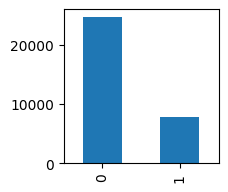

In [85]:
#plotting a bar chat to display the classdistribution
data["salary"].value_counts().plot.bar(figsize=(2,2))

# Random Undersampling

In [86]:
c_0,c_1=data["salary"].value_counts()
c_0,c_1

(24698, 7839)

In [87]:
train_0=data[data["salary"]==0]
train_1=data[data["salary"]==1]

In [88]:
train_0.shape,train_1.shape

((24698, 15), (7839, 15))

In [89]:
class_0under=train_0.sample(c_1)

In [90]:
class0_1=pd.concat([class_0under,train_1],axis=0)

In [91]:
class0_1.shape

(15678, 15)

In [92]:
class0_1.salary.value_counts()

0    7839
1    7839
Name: salary, dtype: int64

In [93]:
n_x=class0_1.iloc[:,0:-1]
n_y=class0_1.iloc[:,-1]

In [94]:
n_x.head()

,age,workclass,fnlwgt,education,educationN,marital,occupation,relationship,race,sex,capitalA,capitalB,hours,counrty
16822,47,4,146497,15,10,5,1,4,4,0,0,0,16,11
27946,33,6,37939,9,13,2,3,0,4,1,0,0,35,39
17274,41,4,185057,8,11,4,3,1,4,0,0,0,40,0
20750,37,2,257588,11,9,0,1,4,4,0,0,0,40,39
32211,18,4,180039,2,8,4,12,3,4,0,0,0,20,39


In [95]:
n1x_train,n1x_test,n1y_train,n1y_test=train_test_split(n_x,n_y,test_size=0.2,random_state=101)

In [96]:
n1x_train.shape,n1x_test.shape,n1y_train.shape,n1y_test.shape

((12542, 14), (3136, 14), (12542,), (3136,))

# Random oversampling

In [97]:
#class_lower=train_1.sample(c_0,replace=True)

In [98]:
#class1_0=pd.concat([class_lower,train_0],axis=0)

In [99]:
#class1_0["salary"].value_counts()

In [100]:
#xo=class0_1.iloc[:,0:-1]
#yo=class0_1.iloc[:,-1]

In [101]:
#n1ox_train,n1ox_test,n1oy_train,n1oy_test=train_test_split(xo,yo,test_size=0.2,random_state=101)

In [102]:
#n1ox_train.shape,n1ox_test.shape,n1oy_train.shape,n1oy_test.shape

# EDA (Exploratory Data Analysis)

In [103]:
df=data.corr()
df

,age,workclass,fnlwgt,education,educationN,marital,occupation,relationship,race,sex,capitalA,capitalB,hours,counrty,salary
age,1.000000,0.003783,-0.076447,-0.010551,0.036224,-0.266137,-0.020911,-0.263744,0.029116,0.088708,0.077676,0.057745,0.068515,-0.001524,0.234037
workclass,0.003783,1.000000,-0.016601,0.023456,0.052169,-0.064761,0.254993,-0.090433,0.049740,0.095999,0.033852,0.012240,0.139047,-0.007677,0.051665
fnlwgt,-0.076447,-0.016601,1.000000,-0.028053,-0.043388,0.028123,0.001403,0.008868,-0.021497,0.027089,0.000429,-0.010260,-0.018898,-0.051874,-0.009502
education,-0.010551,0.023456,-0.028053,1.000000,0.359085,-0.038422,-0.021235,-0.011057,0.014303,-0.027433,0.030085,0.016793,0.055991,0.063870,0.079366
educationN,0.036224,0.052169,-0.043388,0.359085,1.000000,-0.069161,0.109753,-0.094432,0.032011,0.012205,0.122664,0.079892,0.148422,0.050136,0.335272
marital,-0.266137,-0.064761,0.028123,-0.038422,-0.069161,1.000000,-0.009814,0.185532,-0.067930,-0.129402,-0.043368,-0.034140,-0.190432,-0.023406,-0.199199
occupation,-0.020911,0.254993,0.001403,-0.021235,0.109753,-0.009814,1.000000,-0.075587,0.006794,0.080501,0.025506,0.017985,0.080501,-0.012406,0.075419
relationship,-0.263744,-0.090433,0.008868,-0.011057,-0.094432,0.185532,-0.075587,1.000000,-0.116051,-0.582594,-0.057947,-0.061098,-0.248875,-0.005636,-0.250948
race,0.029116,0.049740,-0.021497,0.014303,0.032011,-0.067930,0.006794,-0.116051,1.000000,0.087472,0.011154,0.018913,0.041920,0.137850,0.071847
sex,0.088708,0.095999,0.027089,-0.027433,0.012205,-0.129402,0.080501,-0.582594,0.087472,1.000000,0.048489,0.045571,0.229187,-0.008256,0.215969


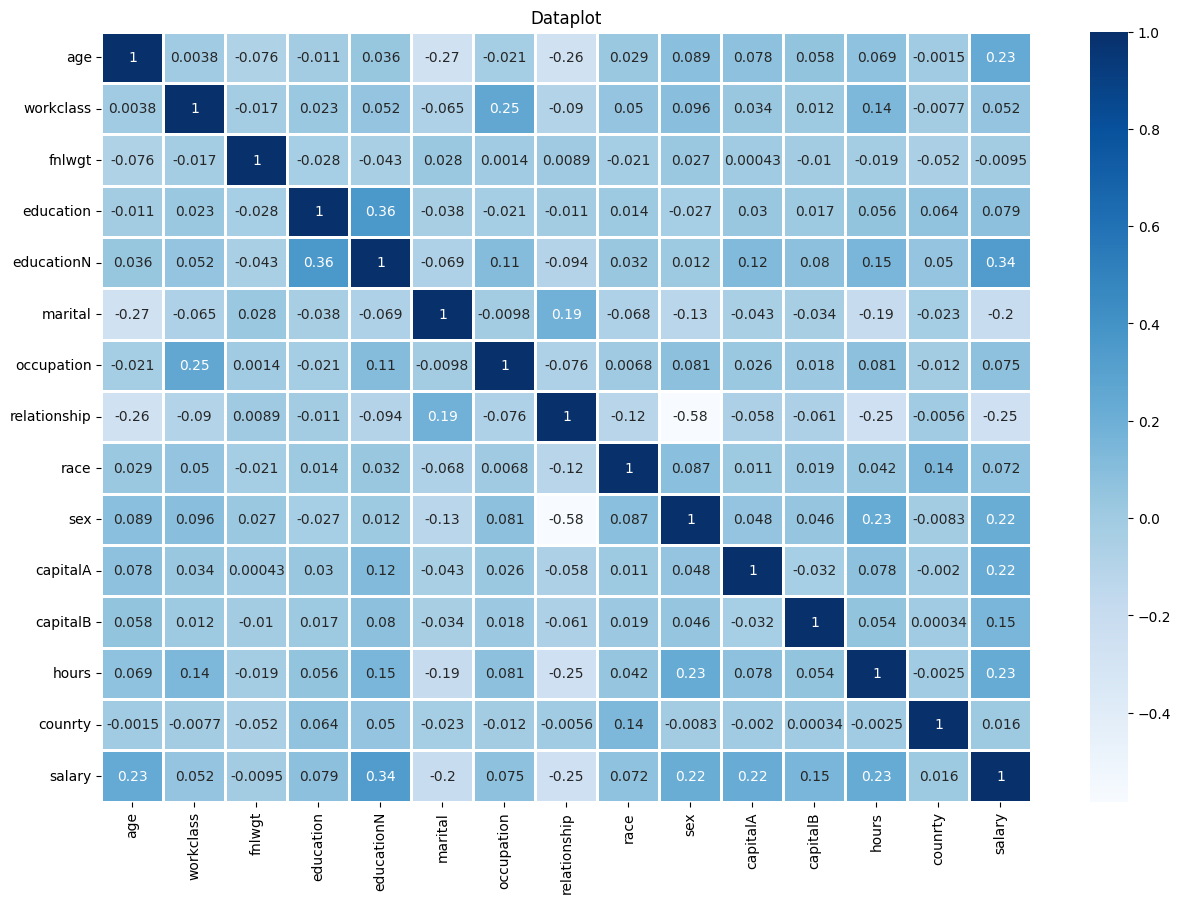

In [104]:
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(df,linewidth=1,annot=True,cmap=plt.cm.Blues)
plt.title("Dataplot")
plt.show()  #0 to 1

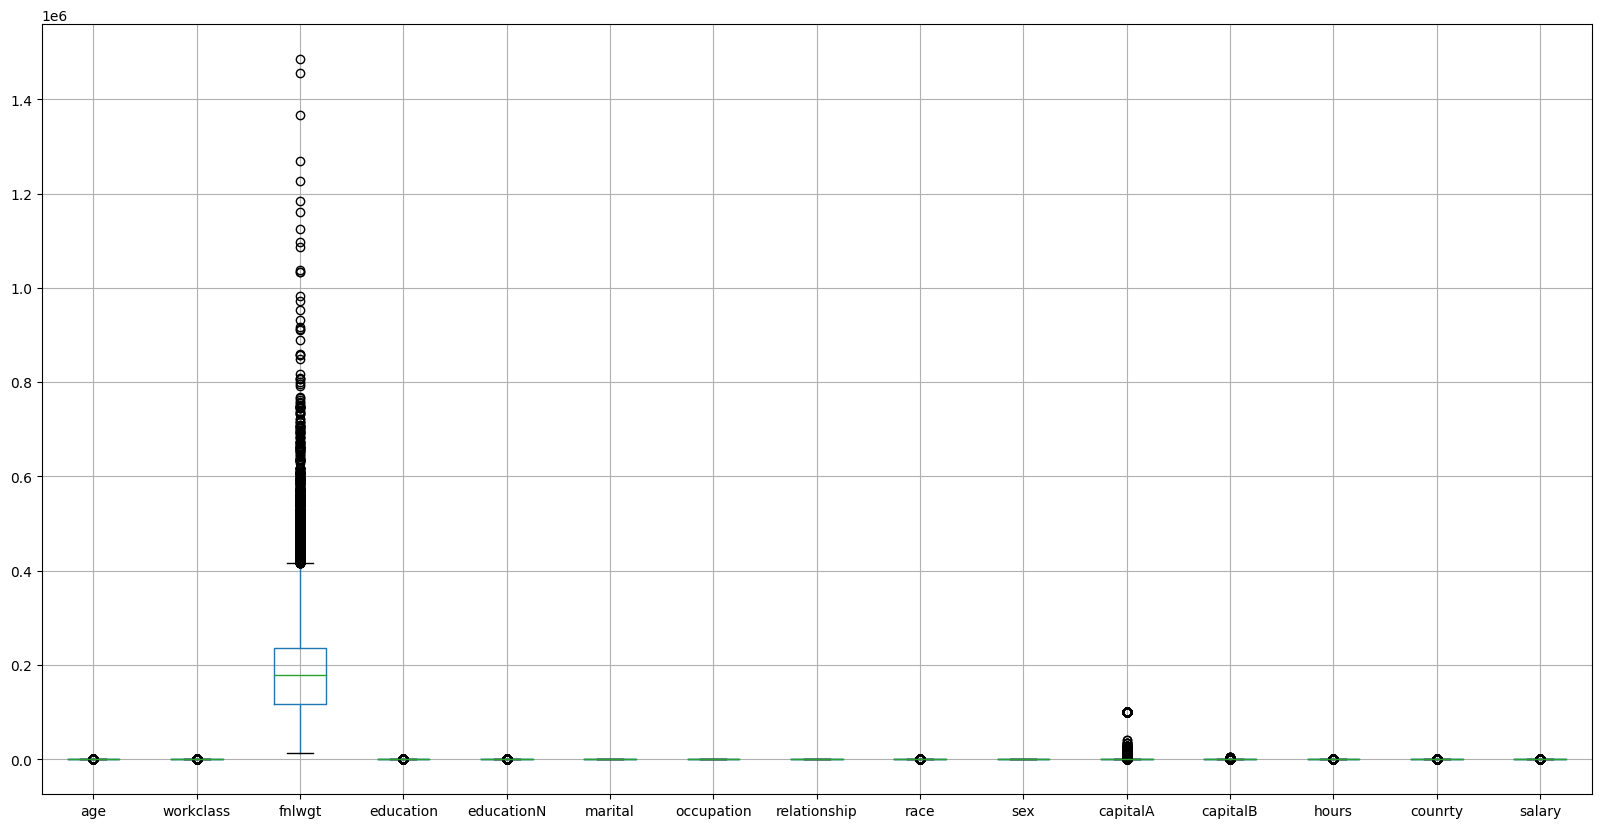

In [105]:
data.boxplot(figsize=(20,10))
plt.show()

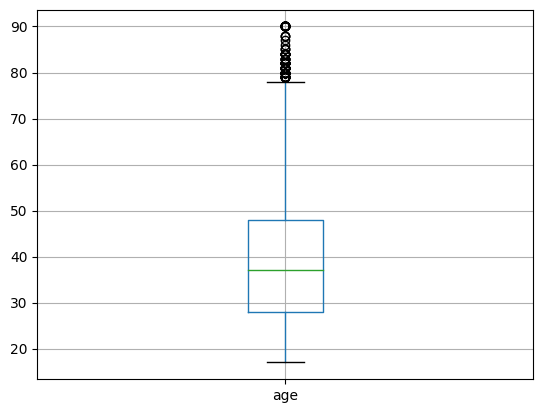

In [106]:
 #outlier treatment
data.boxplot(column="age")
plt.show()

In [107]:
data.age.describe()

count    32537.000000
mean        38.585549
std         13.637984
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

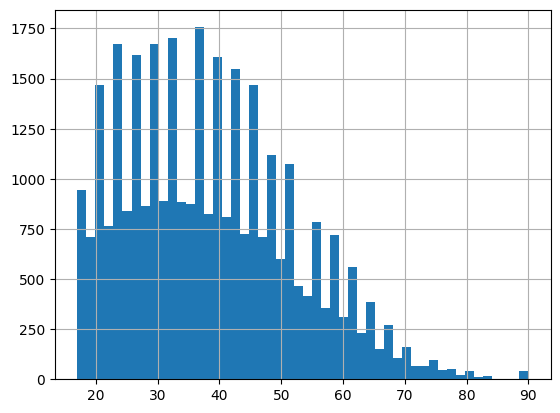

In [108]:
data.age.hist(bins=50)
plt.show()

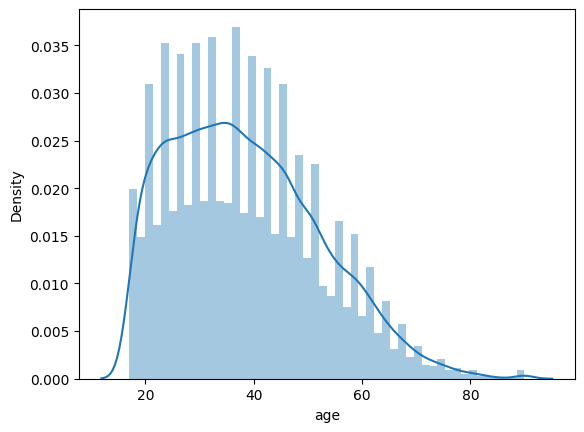

In [109]:
sns.distplot(data["age"])
plt.show()

In [110]:
iqr=data.age.quantile(0.75)-data.age.quantile(0.25)
iqr

20.0

In [111]:
u1=data["age"].quantile(0.75)+3*iqr
l1=data["age"].quantile(0.25)-3*iqr
print(u1,l1)

108.0 -32.0


In [112]:
data.loc[data["age"]>108.0,"age"]=108.0
data.loc[data["age"]<-32.0,"age"]=-32.0

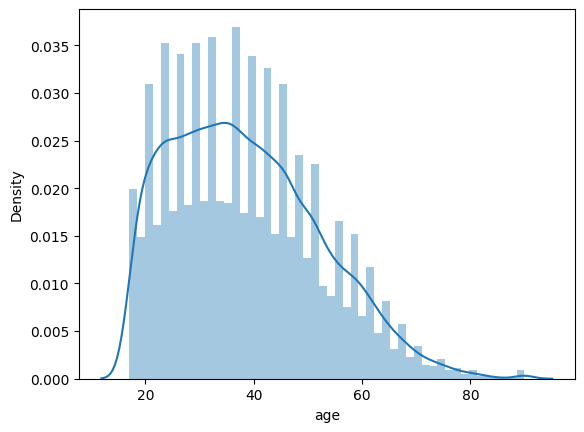

In [113]:
sns.distplot(data["age"])
plt.show()

In [114]:
#educationN

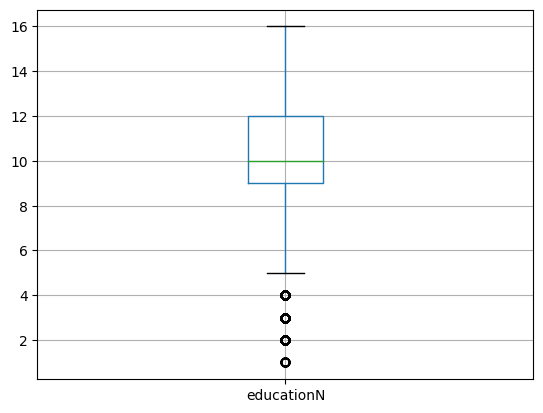

In [115]:
data.boxplot(column="educationN")
plt.show()

In [116]:
data.educationN.describe()

count    32537.000000
mean        10.081815
std          2.571633
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: educationN, dtype: float64

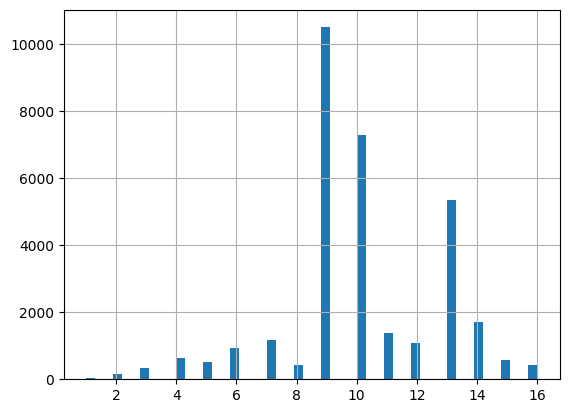

In [117]:
data.educationN.hist(bins=50)
plt.show()

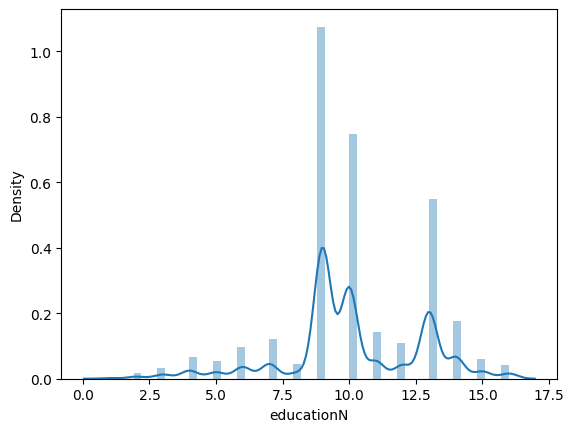

In [118]:
sns.distplot(data["educationN"])
plt.show()

In [119]:
iqr=data.educationN.quantile(0.75)-data.educationN.quantile(0.25)
iqr

3.0

In [120]:
u2=data["educationN"].quantile(0.75)+3*iqr
l2=data["educationN"].quantile(0.25)-3*iqr
print(u2,l2)

21.0 0.0


In [121]:
data.loc[data["educationN"]>21.0,"educationN"]=21.0

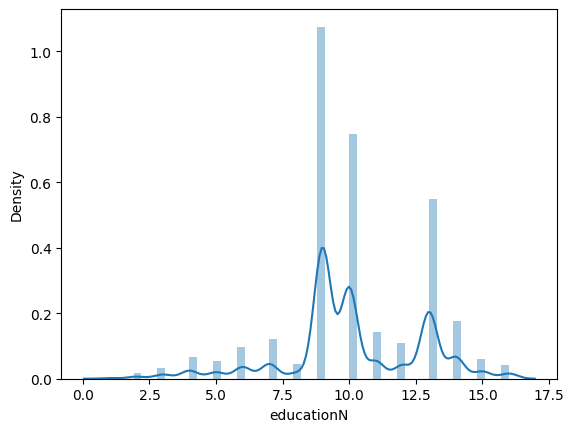

In [122]:
sns.distplot(data["educationN"])#Normally distributed(symmetric)mean=median=mode
plt.show()

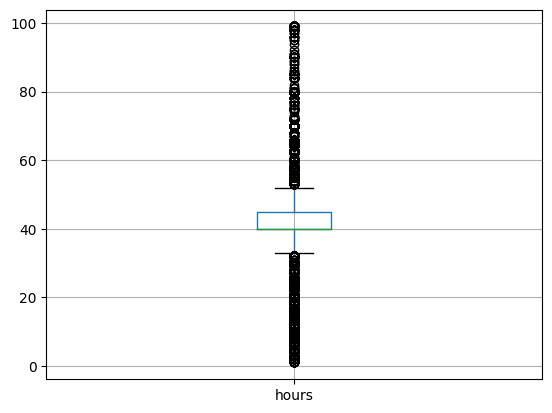

In [123]:
#hours
data.boxplot(column="hours")
plt.show()

In [124]:
data.hours.describe()

count    32537.000000
mean        40.440329
std         12.346889
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours, dtype: float64

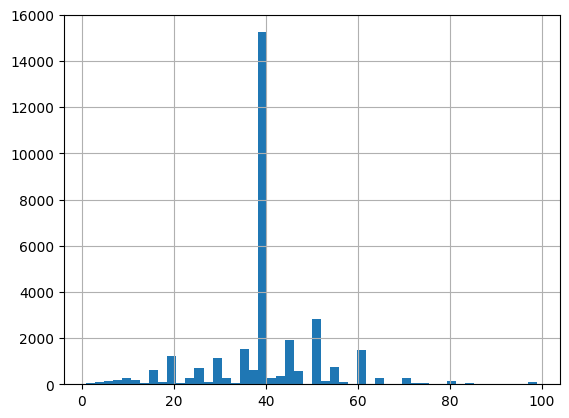

In [125]:
data.hours.hist(bins=50)
plt.show()

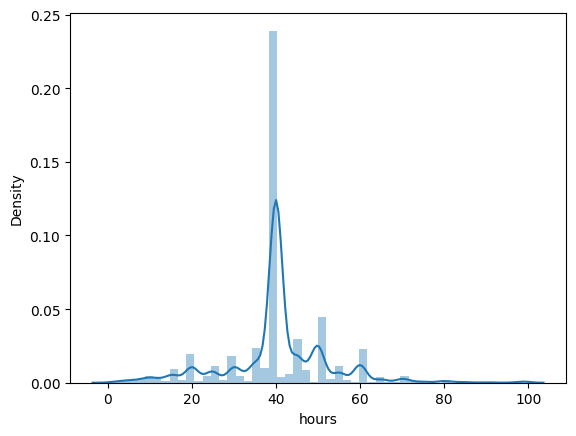

In [126]:
sns.distplot(data["hours"])
plt.show()

In [127]:
iqr=data.hours.quantile(0.75)-data.hours.quantile(0.25) # remove Outliers(Q3-Q1)
iqr

5.0

In [128]:
u3=data["hours"].quantile(0.75)+3*iqr# upper_limit=Q1+3*IQR
l3=data["hours"].quantile(0.25)-3*iqr#lower_limit=Q1-3*IQR
print(u3,l3)

60.0 25.0


In [129]:
data.loc[data["hours"]>60.0,"hours"]=60.0

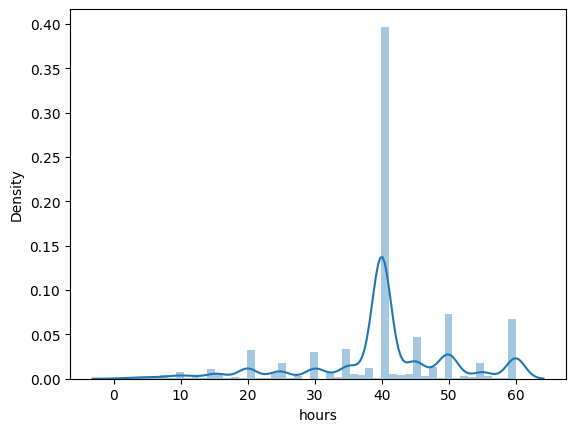

In [130]:
sns.distplot(data["hours"])
plt.show()

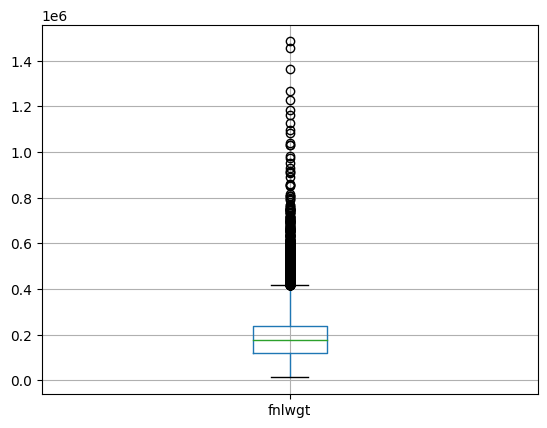

In [131]:
#fnlwgt
data.boxplot(column="fnlwgt")
plt.show()

In [132]:
data.fnlwgt.describe()

count    3.253700e+04
mean     1.897808e+05
std      1.055565e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.369930e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

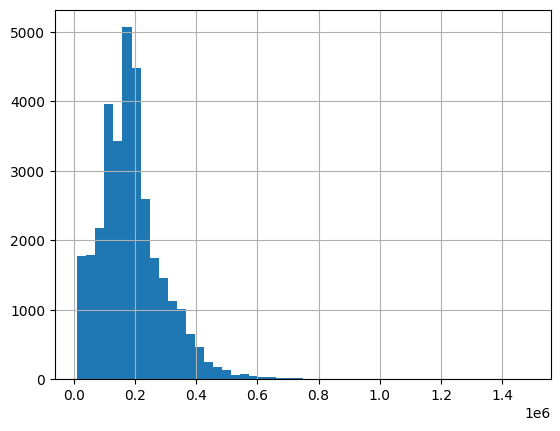

In [133]:
data.fnlwgt.hist(bins=50)
plt.show()

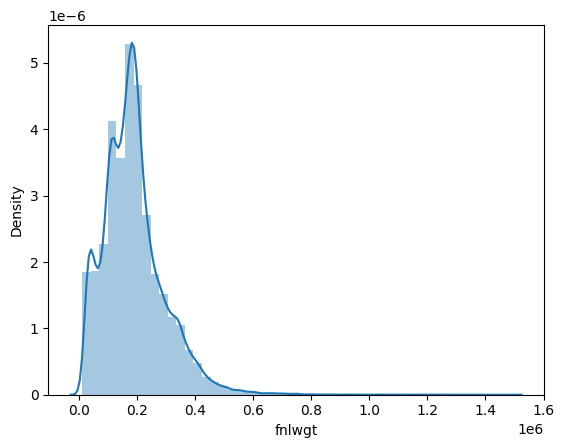

In [134]:
sns.distplot(data["fnlwgt"])
plt.show()

In [135]:
iqr=data.fnlwgt.quantile(0.75)-data.fnlwgt.quantile(0.25)
iqr

119166.0

In [136]:
u4=data["fnlwgt"].quantile(0.75)+3*iqr
l4=data["fnlwgt"].quantile(0.25)-3*iqr
print(u4,l4)

594491.0 -239671.0


In [137]:
data.loc[data["fnlwgt"]>594491.0,"fnlwgt"]=594491.0

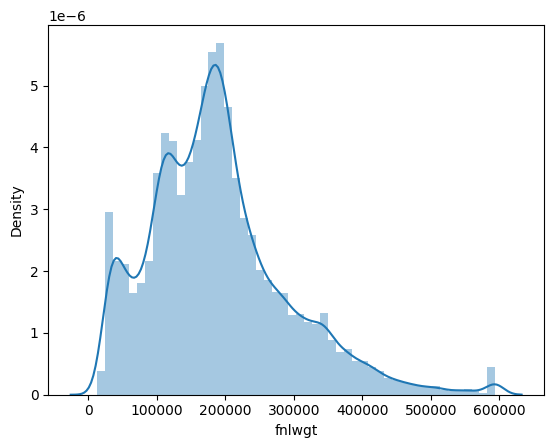

In [138]:
sns.distplot(data["fnlwgt"])
plt.show()

In [139]:
#capitalA
#data.boxplot(column="capitalA")

In [140]:
#data.capitalA.describe()

In [141]:
#data.capitalA.hist(bins=50)

In [142]:
#sns.distplot(data["capitalA"])

In [143]:
#iqr=data.capitalA.quantile(0.75)-data.capitalA.quantile(0.25)
#iqr

In [144]:
#u5=data["capitalA"].quantile(0.75)+1.5*iqr
#l5=data["capitalA"].quantile(0.25)-1.5*iqr
#print(u5,l5)

In [145]:
#data.loc[data["capitalA"]>0.0,"capitalA"]=0.0

In [146]:
#sns.distplot(data["capitalA"])

In [147]:
#capitalB
#data.boxplot(column="capitalB")

In [148]:
#data.capitalB.describe()

In [149]:
#data.capitalB.hist(bins=50)

In [150]:
#sns.distplot(data["capitalB"])

In [151]:
#iqr=data.capitalB.quantile(0.75)-data.capitalB.quantile(0.25)
#iqr

In [152]:
#u6=data["capitalB"].quantile(0.75)+3*iqr
#l6=data["capitalB"].quantile(0.25)-3*iqr
#print(u6,l6)

In [153]:
#data.loc[data["capitalB"]>0.0,"capitalB"]=0.0

In [154]:
#sns.distplot(data["capitalB"])

# Prediction on Full Data

In [155]:
data_x=data.iloc[:,0-1]
data_y=data.iloc[:,-1]

In [156]:
data_x.head()

0    0
1    0
2    0
3    0
4    0
Name: salary, dtype: int32

In [157]:
#AUCROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [158]:
roc=roc_auc_score(lr_pred,py_test)

In [159]:
df_n1=pd.DataFrame(lr_pred)

In [160]:
fpr,tpr,threshould=roc_curve(py_test,df_n1.iloc[:,0])
fpr

array([0.        , 0.05826613, 1.        ])

In [161]:
tpr

array([0.        , 0.29198966, 1.        ])

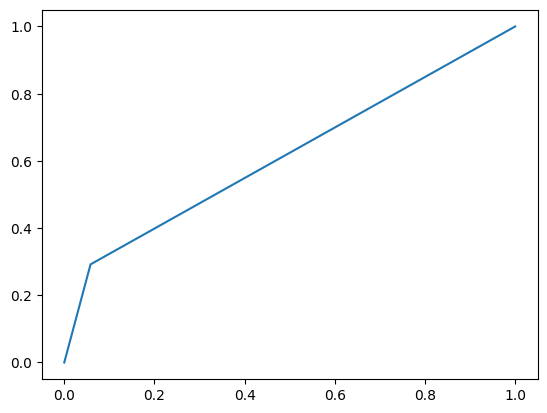

In [162]:
plt.plot(fpr,tpr)

In [163]:
#precision recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [164]:
precision,recall,threshould=precision_recall_curve(py_test,df_n1.iloc[:,0])

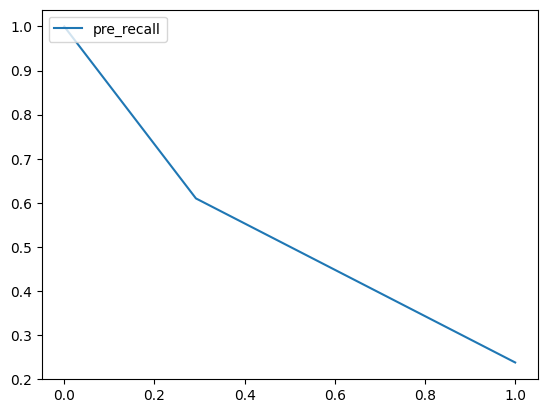

In [165]:
plt.plot(recall,precision,label="pre_recall")
plt.xlabel=("recall")
plt.ylabel=("precision")
plt.legend(loc="upper left")

# Feature Selection

# RFE(Recursive feature elimination)

In [166]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [167]:
dt=DecisionTreeClassifier()

In [168]:
rfe=RFE(dt)

In [169]:
rfe.fit(data.iloc[:,0:15],data.iloc[:,1])

RFE(estimator=DecisionTreeClassifier())

In [170]:
rfe.support_

array([False,  True, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True])

In [171]:
data1=pd.DataFrame({"feature support":list(rfe.support_),"columns":list(data.iloc[:,0:15].columns)})
data1

,feature support,columns
0,False,age
1,True,workclass
2,False,fnlwgt
3,False,education
4,False,educationN
5,False,marital
6,False,occupation
7,False,relationship
8,False,race
9,True,sex


In [172]:
data2=data1.sort_values("feature support",ascending=False)
data2

,feature support,columns
1,True,workclass
9,True,sex
10,True,capitalA
11,True,capitalB
12,True,hours
13,True,counrty
14,True,salary
0,False,age
2,False,fnlwgt
3,False,education


In [173]:
#logistic Regression

In [174]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [175]:
lr.fit(px_train,py_train)

LogisticRegression()

In [176]:
lr_pred=lr.predict(px_test)
lr_pred

array([0, 1, 0, ..., 0, 0, 0])

In [177]:
s9=confusion_matrix(py_test,lr_pred)
s9

array([[4671,  289],
       [1096,  452]], dtype=int64)

In [178]:
lr_acc=s9.diagonal().sum()/s9.sum()*100
lr_acc

78.71850030731407

In [179]:
print(classification_report(lr_pred,py_test))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      5767
           1       0.29      0.61      0.39       741

    accuracy                           0.79      6508
   macro avg       0.62      0.71      0.63      6508
weighted avg       0.87      0.79      0.82      6508



In [180]:
#RandomForest

In [181]:
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier()

In [182]:
rf1.fit(px_train,py_train)

RandomForestClassifier()

In [183]:
rf1_pred=rf1.predict(px_test)
rf1_pred

array([0, 0, 0, ..., 0, 1, 0])

In [184]:
p=confusion_matrix(py_test,rf1_pred)
p

array([[4655,  305],
       [ 573,  975]], dtype=int64)

In [185]:
rf1_acc=p.diagonal().sum()/p.sum()*100
rf1_acc

86.50891210817456

In [186]:
print(classification_report(rf1_pred,py_test))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      5228
           1       0.63      0.76      0.69      1280

    accuracy                           0.87      6508
   macro avg       0.78      0.83      0.80      6508
weighted avg       0.88      0.87      0.87      6508



In [187]:
#AdaBoost

In [188]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [189]:
ad1=AdaBoostClassifier(RandomForestClassifier(),n_estimators=5)

In [190]:
ad1.fit(px_train,py_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=5)

In [191]:
ad1_pred=ad1.predict(px_test)
ad1_pred

array([0, 0, 0, ..., 0, 1, 0])

In [192]:
p0=confusion_matrix(py_test,ad1_pred)
p0

array([[4661,  299],
       [ 590,  958]], dtype=int64)

In [193]:
ad1_acc=p0.diagonal().sum()/p0.sum()*100
ad1_acc

86.33988936693301

In [194]:
print(classification_report(ad1_pred,py_test))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      5251
           1       0.62      0.76      0.68      1257

    accuracy                           0.86      6508
   macro avg       0.78      0.82      0.80      6508
weighted avg       0.88      0.86      0.87      6508



In [195]:
#xgboost

In [196]:
from xgboost import XGBClassifier
xg1=XGBClassifier()

In [197]:
xg1.fit(px_train,py_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [198]:
xg1_pred=xg1.predict(px_test)
xg1_pred

array([0, 0, 0, ..., 0, 1, 0])

In [199]:
p1=confusion_matrix(py_test,xg1_pred)
p1

array([[4708,  252],
       [ 538, 1010]], dtype=int64)

In [200]:
xg1_acc=p1.diagonal().sum()/p1.sum()*100
xg1_acc

87.86109403810694

In [201]:
print(classification_report(xg1_pred,py_test))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      5246
           1       0.65      0.80      0.72      1262

    accuracy                           0.88      6508
   macro avg       0.80      0.85      0.82      6508
weighted avg       0.89      0.88      0.88      6508



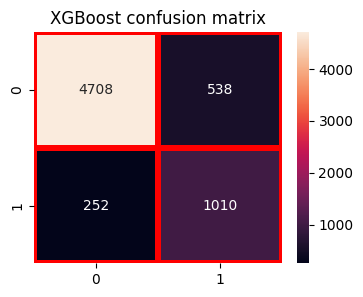

In [202]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(xg1_pred,py_test),
             annot=True,fmt="d",linecolor="r",linewidths=3)
plt.title("XGBoost confusion matrix",fontsize=12)
plt.show()

# Conclusion

# I got 87% accuracy with xgboost Model after class inbalance technique with good precision,recall and f1-score.

# Hence xgboost model is most suitable for salary prediction data